# Cancer Patient Analysis: Air Pollution & Disease Correlation

This project focuses on developing a machine learning classification system to predict cancer risk levels (Low, Medium, High) based on patient data including air pollution exposure and genetic factors. 
The dataset contains approximately 1,000 patient records with 23 features such as age, air pollution index, genetic risk, smoking habits, and various medical symptoms. 
We implemented and compared three classification algorithms: Logistic Regression for baseline linear modeling, K-Nearest Neighbors (KNN) for instance-based learning, and Support Vector Machines (SVM) for optimal hyperplane separation. 
The complete workflow includes data preprocessing, data leakage removal, and hyperparameter optimization using GridSearchCV. 
**Dataset Source:** Cancer Patients and Air Pollution Dataset


## 1. Setup


In [32]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.base import clone
from sklearn.model_selection import RepeatedStratifiedKFold

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
RANDOM_STATE = 67
np.random.seed(RANDOM_STATE)

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


## 2. Load and inspect dataset


In [6]:
# Load the dataset
df = pd.read_csv('/content/cancer_patient.csv')

print("Dataset Shape:", df.shape)
print(f"\nTotal Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\n")

# Display first few rows
print("\nFirst 5 Records:")
df.head()


Dataset Shape: (1000, 26)

Total Records: 1000
Total Features: 26



First 5 Records:


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
# Display dataset information
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Ches

In [7]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values detected in the dataset")
else:
    print(missing_values[missing_values > 0])


Missing Values Analysis:
✓ No missing values detected in the dataset


## 3. Exploratory Data Analysis (EDA)

### 3.1 Statistical Summary

In [8]:
# Descriptive statistics for numerical features
print("Descriptive Statistics:")
df.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [9]:
# Target variable distribution
print("Target Variable Distribution (Cancer Level):")
print("="*60)
target_dist = df['Level'].value_counts().sort_index()
print(target_dist)
print(f"\nPercentage Distribution:")
print((target_dist / len(df) * 100).round(2))

Target Variable Distribution (Cancer Level):
Level
High      365
Low       303
Medium    332
Name: count, dtype: int64

Percentage Distribution:
Level
High      36.5
Low       30.3
Medium    33.2
Name: count, dtype: float64


### 3.2 Target Variable Visualization

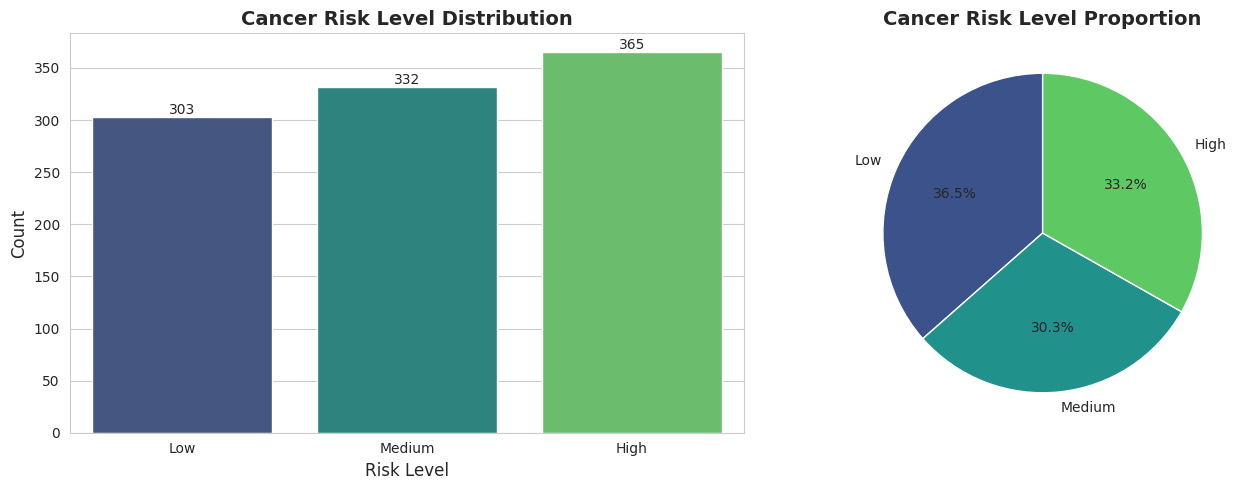

In [10]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Level', order=['Low', 'Medium', 'High'],
              palette='viridis', ax=axes[0])
axes[0].set_title('Cancer Risk Level Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=10)

# Pie chart
colors = sns.color_palette('viridis', 3)
target_dist.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[1],
                 startangle=90, labels=['Low', 'Medium', 'High'])
axes[1].set_title('Cancer Risk Level Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 3.3 Feature Correlation Analysis

Analyze correlations between features to identify relationships, particularly between air pollution and cancer risk indicators.

In [10]:
# Prepare data for correlation analysis
# Encode categorical variables temporarily for correlation
df_corr = df.copy()

# Encode Gender (1=Male, 2=Female)
# Encode Level (Low=0, Medium=1, High=2)
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_corr['Level_Encoded'] = df_corr['Level'].map(level_mapping)

# Select numerical columns for correlation
numerical_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()
# Remove index and Patient Id
numerical_cols = [col for col in numerical_cols if col not in ['index', 'Patient Id']]

# Calculate correlation matrix
correlation_matrix = df_corr[numerical_cols].corr()

print("Correlation Matrix Shape:", correlation_matrix.shape)

Correlation Matrix Shape: (24, 24)


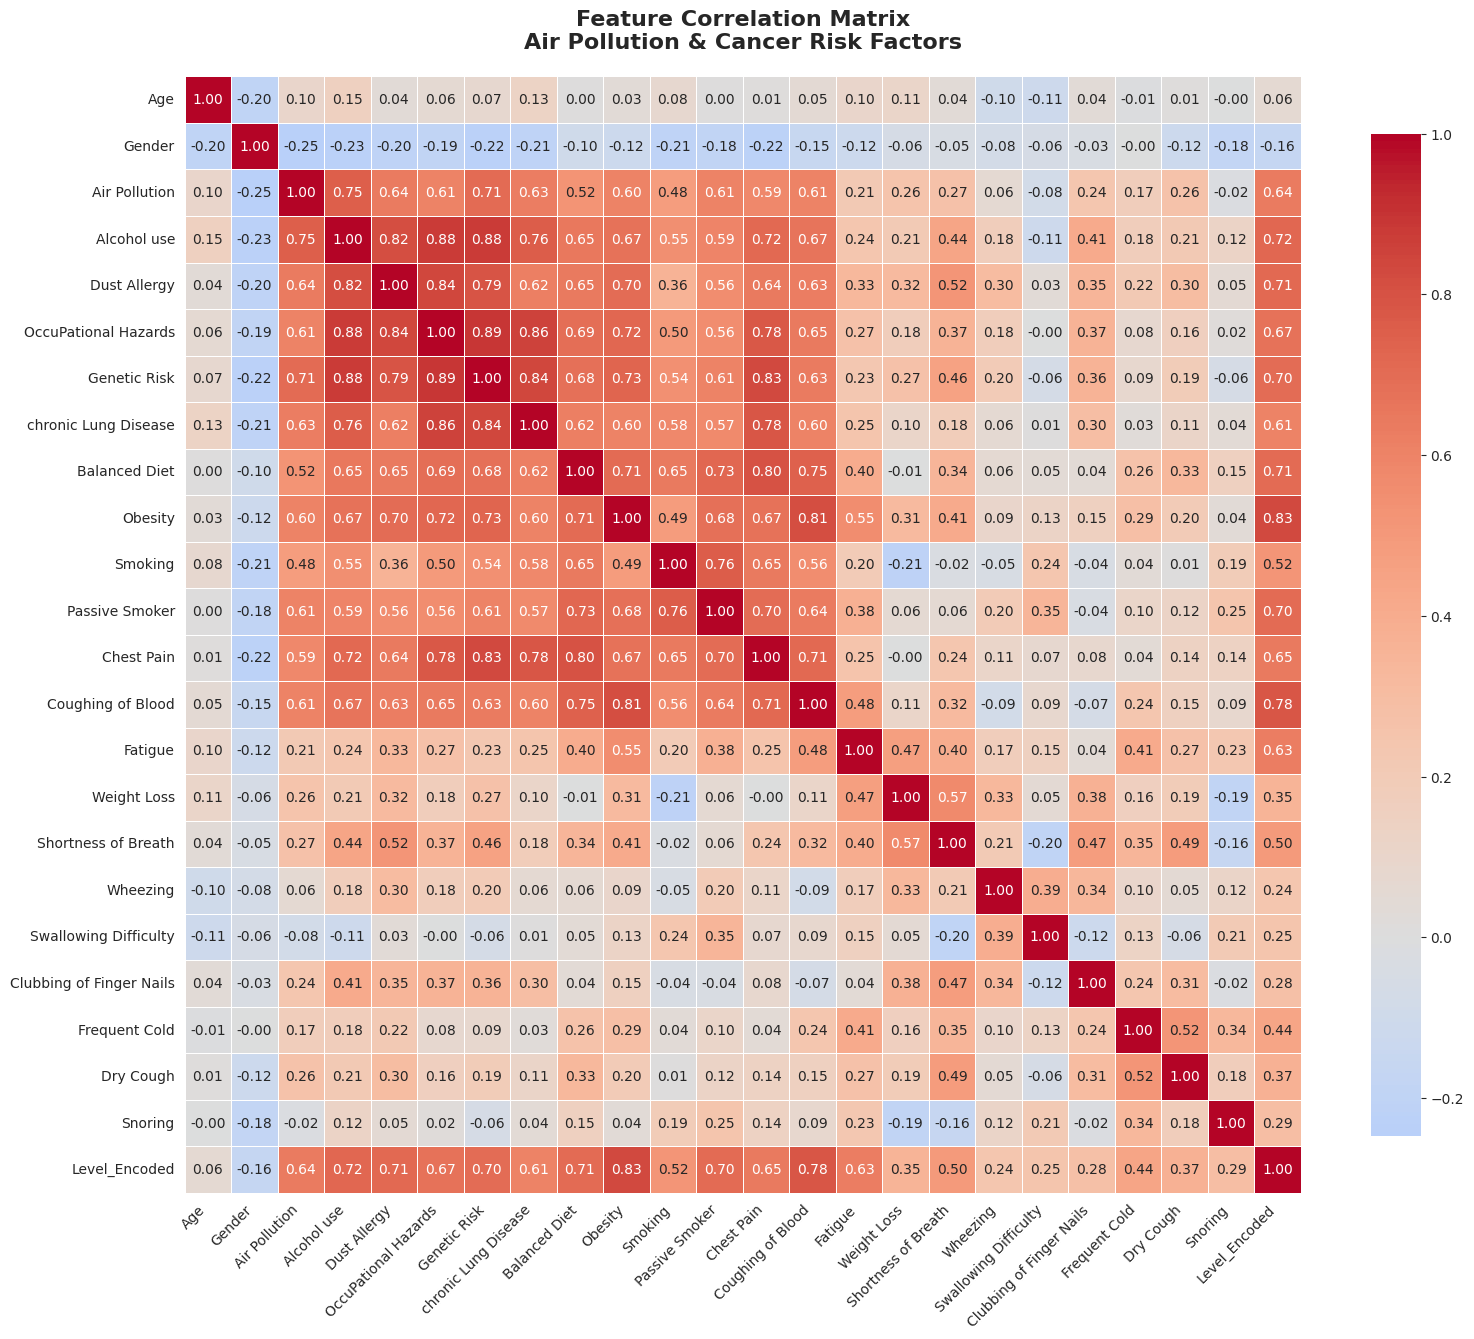

In [11]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix\nAir Pollution & Cancer Risk Factors',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

## 4. Preprocessing


### 4.1 Drop identifier columns


In [12]:
# Drop unnecessary columns
df_processed = df.drop(['index', 'Patient Id'], axis=1)  # keep only features + target

print("Features after dropping ID columns:")
print(df_processed.columns.tolist())
print(f"\nTotal Features: {df_processed.shape[1] - 1}")  # Excluding target
print(f"Target Variable: Level")


Features after dropping ID columns:
['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']

Total Features: 23
Target Variable: Level


### 4.2 Encode target (`Level`)


In [13]:
# Encode target variable (Level)
label_encoder = LabelEncoder()
df_processed['Level'] = label_encoder.fit_transform(df_processed['Level'])

print("Target Variable Encoding:")
print("="*80)
for idx, label in enumerate(label_encoder.classes_):
    print(f"{label}: {idx}")

print(f"\nEncoded Target Distribution:")
print(df_processed['Level'].value_counts().sort_index())


Target Variable Encoding:
High: 0
Low: 1
Medium: 2

Encoded Target Distribution:
Level
0    365
1    303
2    332
Name: count, dtype: int64


## 5. Baseline modeling


In [14]:
# Split features/target (before cleaning)
target_col = "Level"
X_raw = df_processed.drop(columns=[target_col])
y_raw = df_processed[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, stratify=y_raw, random_state=42
)

def evaluate_models(X_train, y_train, X_test, y_test, title=""):
    models = {
        "Logistic Regression": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=3000, random_state=42))
        ]),
        "KNN": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", KNeighborsClassifier(n_neighbors=5))
        ]),
        "SVM (RBF)": Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
        ])
    }

    rows = []
    fitted = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rows.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Macro F1": f1_score(y_test, y_pred, average="macro"),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        })
        fitted[name] = model

    results_df = pd.DataFrame(rows).sort_values(by="Macro F1", ascending=False).reset_index(drop=True)

    if title:
        print(title)
        print("=" * len(title))
    display(results_df)

    best_name = results_df.loc[0, "Model"]
    best_model = fitted[best_name]
    best_pred = best_model.predict(X_test)

    print(f"Best model (by Macro F1): {best_name}")
    print("\nClassification report:")
    print(classification_report(y_test, best_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, best_pred))

    return results_df, fitted

baseline_results_df, baseline_fitted = evaluate_models(
    X_train, y_train, X_test, y_test,
    title="Baseline results (before cleaning)"
)


Baseline results (before cleaning)


,Model,Accuracy,Macro F1,Balanced Accuracy
0,Logistic Regression,1.0,1.0,1.0
1,KNN,1.0,1.0,1.0
2,SVM (RBF),1.0,1.0,1.0


Best model (by Macro F1): Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion matrix:
[[73  0  0]
 [ 0 61  0]
 [ 0  0 66]]


## 6. Data integrity audit (leakage detection)
We check for duplicated feature vectors, overlap between train and test, and conflicting labels for identical features.
Raw data did not contain duplicate feature vectors.
However, after preprocessing and feature engineering, many samples became identical in feature space, which caused data leakage between training and test sets.


In [40]:
# 6.1 Overlap between train and test (identical feature vectors)
train_hash = pd.util.hash_pandas_object(X_train, index=False)
test_hash  = pd.util.hash_pandas_object(X_test, index=False)

overlap_hashes = set(train_hash).intersection(set(test_hash))
print(len(overlap_hashes))

# 6.2 Duplicated feature vectors in the full feature space
dup_features = X_raw.duplicated().sum()
print("Duplicate feature vectors in the full X (features only):", dup_features)


# 6.3 Conflicting labels for identical feature vectors
tmp = df_processed.copy()
X_cols = [c for c in tmp.columns if c != target_col]

label_nunique = tmp.groupby(X_cols)[target_col].nunique()
conflict_keys = label_nunique[label_nunique > 1]
print("Number of feature vectors with conflicting labels:", conflict_keys.shape[0])


88
Duplicate feature vectors in the full X (features only): 848
Number of feature vectors with conflicting labels: 0


In [41]:
# Find one duplicated feature vector and show all records that share it

dup_mask = X_raw.duplicated(keep=False)

if dup_mask.sum() > 0:
    dup_X = X_raw[dup_mask]

    # first example
    first_dup_vector = dup_X.iloc[0]

    # find all rows with exactly the same features
    same_vector_mask = (X_raw == first_dup_vector).all(axis=1)

    duplicated_records = df_processed.loc[same_vector_mask]

    print("Number of records sharing this exact feature vector:", duplicated_records.shape[0])
    print("\nRecord indices (IDs):", list(duplicated_records.index))

    print("\nDuplicated feature vector (X):")
    display(first_dup_vector.to_frame(name="value"))

    print("\nAll records with this feature vector (including labels):")
    display(duplicated_records)
else:
    print("No duplicated feature vectors found in X.")


Number of records sharing this exact feature vector: 20

Record indices (IDs): [0, 33, 117, 144, 179, 228, 255, 339, 366, 450, 477, 561, 588, 672, 699, 783, 810, 894, 921, 976]

Duplicated feature vector (X):


,value
Age,33
Gender,1
Air Pollution,2
Alcohol use,4
Dust Allergy,5
OccuPational Hazards,4
Genetic Risk,3
chronic Lung Disease,2
Balanced Diet,2
Obesity,4



All records with this feature vector (including labels):


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
33,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
117,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
144,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
179,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
228,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
255,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
339,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
366,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
450,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1


## 7. Cleaning
We remove duplicates in feature space by grouping identical feature vectors and assigning the majority class label (`mode`).


In [16]:
# Group by identical feature vectors and assign the majority label (mode)
data_clean = (
    df_processed
    .groupby(X_cols)[target_col]
    .agg(lambda s: s.mode()[0])
    .reset_index()
)

print("Shape before cleaning:", df_processed.shape)
print("Shape after cleaning:", data_clean.shape)

X_clean = data_clean.drop(columns=[target_col])
y_clean = data_clean[target_col]

print("Duplicate feature vectors after cleaning:", X_clean.duplicated().sum())


Shape before cleaning: (1000, 24)
Shape after cleaning: (152, 24)
Duplicate feature vectors after cleaning: 0


## 8. Modeling after cleaning
We repeat the same evaluation on the cleaned dataset.


In [18]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42
)

clean_results_df, clean_fitted = evaluate_models(
    X_train_c, y_train_c, X_test_c, y_test_c,
    title="Results after cleaning"
)


Results after cleaning


,Model,Accuracy,Macro F1,Balanced Accuracy
0,Logistic Regression,0.935484,0.938889,0.939394
1,SVM (RBF),0.903226,0.907059,0.902357
2,KNN,0.903226,0.900362,0.895623


Best model (by Macro F1): Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      1.00      1.00         9
           2       0.85      1.00      0.92        11

    accuracy                           0.94        31
   macro avg       0.95      0.94      0.94        31
weighted avg       0.95      0.94      0.93        31

Confusion matrix:
[[ 9  0  2]
 [ 0  9  0]
 [ 0  0 11]]


## 9. Cross-validation on cleaned data
We estimate generalization using stratified 5-fold cross-validation and report mean ± std.


In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
    ])
}

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "balanced_acc": "balanced_accuracy"
}

cv_rows = []
for name, model in cv_models.items():
    scores = cross_validate(model, X_clean, y_clean, cv=cv, scoring=scoring, return_train_score=False)
    cv_rows.append({
        "Model": name,
        "Accuracy (mean)": scores["test_accuracy"].mean(),
        "Accuracy (std)": scores["test_accuracy"].std(),
        "Macro F1 (mean)": scores["test_f1_macro"].mean(),
        "Macro F1 (std)": scores["test_f1_macro"].std(),
        "Balanced Acc (mean)": scores["test_balanced_acc"].mean(),
        "Balanced Acc (std)": scores["test_balanced_acc"].std(),
    })

cv_results_df = pd.DataFrame(cv_rows).sort_values(by="Macro F1 (mean)", ascending=False).reset_index(drop=True)
display(cv_results_df)


,Model,Accuracy (mean),Accuracy (std),Macro F1 (mean),Macro F1 (std),Balanced Acc (mean),Balanced Acc (std)
0,Logistic Regression,0.960430,0.025065,0.960164,0.024395,0.959731,0.023465
1,SVM (RBF),0.933763,0.036909,0.933498,0.036510,0.933064,0.035318
2,KNN,0.927527,0.038671,0.926791,0.039078,0.926397,0.037822


## 10. Permutation test (leakage sanity check)
We permute training labels and verify that performance drops to near-chance level.


In [27]:
# Select the best model by CV Macro F1
best_model_name = cv_results_df.loc[0, "Model"]
best_model = cv_models[best_model_name]
print("Best CV model:", best_model_name)

# Fit best model normally (reference)
best_model.fit(X_train_c, y_train_c)
y_pred_ref = best_model.predict(X_test_c)
ref_acc = accuracy_score(y_test_c, y_pred_ref)
ref_f1  = f1_score(y_test_c, y_pred_ref, average="macro")
print(f"Reference test performance -> Accuracy: {ref_acc:.4f}, Macro F1: {ref_f1:.4f}")

# Permutation test
n_runs = 30
rng = np.random.default_rng(42)
perm_acc = []
perm_f1  = []

for _ in range(n_runs):
    y_perm = rng.permutation(y_train_c)
    m = clone(best_model)
    m.fit(X_train_c, y_perm)
    yp = m.predict(X_test_c)
    perm_acc.append(accuracy_score(y_test_c, yp))
    perm_f1.append(f1_score(y_test_c, yp, average="macro"))

print("\nPermutation results (should be near chance):")
print(f"Accuracy -> mean: {np.mean(perm_acc):.4f}, std: {np.std(perm_acc):.4f}, min/max: {np.min(perm_acc):.4f}/{np.max(perm_acc):.4f}")
print(f"Macro F1 -> mean: {np.mean(perm_f1):.4f}, std: {np.std(perm_f1):.4f}, min/max: {np.min(perm_f1):.4f}/{np.max(perm_f1):.4f}")


Best CV model: Logistic Regression
Reference test performance -> Accuracy: 0.9355, Macro F1: 0.9389

Permutation results (should be near chance):
Accuracy -> mean: 0.3065, std: 0.0974, min/max: 0.1613/0.5484
Macro F1 -> mean: 0.2995, std: 0.0967, min/max: 0.1593/0.5362


## 11. Before vs after cleaning (summary)
We compare model performance before and after cleaning to show the impact of leakage.


In [28]:
before = baseline_results_df.copy()
before["Stage"] = "Before cleaning"
after  = clean_results_df.copy()
after["Stage"]  = "After cleaning (Option A)"

compare_df = pd.concat([before, after], ignore_index=True)
compare_df = compare_df[["Stage", "Model", "Accuracy", "Macro F1", "Balanced Accuracy"]]
display(compare_df.sort_values(["Stage","Macro F1"], ascending=[True, False]))


,Stage,Model,Accuracy,Macro F1,Balanced Accuracy
3,After cleaning (Option A),Logistic Regression,0.935484,0.938889,0.939394
4,After cleaning (Option A),SVM (RBF),0.903226,0.907059,0.902357
5,After cleaning (Option A),KNN,0.903226,0.900362,0.895623
0,Before cleaning,Logistic Regression,1.000000,1.000000,1.000000
1,Before cleaning,KNN,1.000000,1.000000,1.000000
2,Before cleaning,SVM (RBF),1.000000,1.000000,1.000000


## 12. Hyperparameter Tuning with GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_and_grids = {
    "Logistic Regression": (
        Pipeline([("scaler", StandardScaler()),
                  ("clf", LogisticRegression(max_iter=5000, random_state=42))]),
        {
            "clf__C": [0.01, 0.1, 1, 10, 100],
            "clf__class_weight": [None, "balanced"]
        }
    ),
    "KNN": (
        Pipeline([("scaler", StandardScaler()),
                  ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": [3,5,7,9,11,15,21],
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2]
        }
    ),
    "SVM": (
        Pipeline([("scaler", StandardScaler()),
                  ("clf", SVC())]),
        {
            "clf__kernel": ["rbf", "linear"],
            "clf__C": [0.1, 1, 10, 100],
            "clf__gamma": ["scale", 0.01, 0.1, 1],
            "clf__class_weight": [None, "balanced"]
        }
    )
}

gs_summary = []
best_models = {}

for name, (pipe, grid) in models_and_grids.items():
    gs = GridSearchCV(
        pipe,
        grid,
        scoring="f1_macro",
        cv=cv,
        n_jobs=-1,
        refit=True
    )
    gs.fit(X_train_c, y_train_c)
    best_models[name] = gs.best_estimator_
    gs_summary.append({"Model": name, "Best CV Macro F1": gs.best_score_, "Best Params": gs.best_params_})

gs_summary_df = pd.DataFrame(gs_summary).sort_values("Best CV Macro F1", ascending=False)
gs_summary_df

,Model,Best CV Macro F1,Best Params
2,SVM,0.967092,"{'clf__C': 1, 'clf__class_weight': None, 'clf_..."
1,KNN,0.966424,"{'clf__n_neighbors': 3, 'clf__p': 1, 'clf__wei..."
0,Logistic Regression,0.958758,"{'clf__C': 10, 'clf__class_weight': None}"


In [34]:

best_name = gs_summary_df.iloc[0]["Model"]
best_model = best_models[best_name]

best_model.fit(X_train_c, y_train_c)
pred = best_model.predict(X_test_c)

acc = accuracy_score(y_test_c, pred)
f1m = f1_score(y_test_c, pred, average="macro")

print("Best tuned model:", best_name)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Macro F1: {f1m:.4f}")
print("\nClassification report:\n", classification_report(y_test_c, pred))
print("Confusion matrix:\n", confusion_matrix(y_test_c, pred))


Best tuned model: SVM
Test Accuracy: 0.9355
Test Macro F1: 0.9389

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       1.00      1.00      1.00         9
           2       0.85      1.00      0.92        11

    accuracy                           0.94        31
   macro avg       0.95      0.94      0.94        31
weighted avg       0.95      0.94      0.93        31

Confusion matrix:
 [[ 9  0  2]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:

# Tuned SVM vs Logistic Regression
# Repeated CV: 5 folds repeated 10 times = 50 evaluations
rcv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000, random_state=42))
    ]),
    "Tuned SVM (linear)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="linear", C=1))
    ])
}

scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "balanced_acc": "balanced_accuracy"
}

rows = []

for name, model in models.items():
    scores = cross_validate(
        model,
        X_clean,
        y_clean,
        cv=rcv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )

    rows.append({
        "Model": name,
        "Accuracy mean": scores["test_accuracy"].mean(),
        "Accuracy std": scores["test_accuracy"].std(),
        "Macro F1 mean": scores["test_f1_macro"].mean(),
        "Macro F1 std": scores["test_f1_macro"].std(),
        "Balanced Acc mean": scores["test_balanced_acc"].mean(),
        "Balanced Acc std": scores["test_balanced_acc"].std()
    })

repeated_cv_df = pd.DataFrame(rows)
repeated_cv_df

,Model,Accuracy mean,Accuracy std,Macro F1 mean,Macro F1 std,Balanced Acc mean,Balanced Acc std
0,Logistic Regression,0.965828,0.030035,0.965479,0.030316,0.965939,0.029705
1,Tuned SVM (linear),0.975032,0.028326,0.974923,0.028399,0.974983,0.028094


## 13. Conclusion & Key Findings
This project demonstrated the importance of data preprocessing in machine learning classification. Initial perfect accuracy was caused by duplicated feature vectors appearing across training and test sets, resulting in data leakage. After cleaning the data using majority voting, realistic model performance was obtained. Baseline models performed similarly, indicating near‑linear separability of the data. Hyperparameter tuning selected a linear SVM as the best model, and repeated cross‑validation confirmed a stable improvement over Logistic Regression. Permutation testing verified that model performance drops to random levels when labels are shuffled, confirming the absence of data leakage and validating the robustness of the final results.